In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import json

In [8]:
from pathlib import Path

In [5]:
#!pip install matplotlib

In [46]:
import os
import pprint

In [9]:
project_path = Path(os.getcwd())

In [12]:
json_path = project_path / 'line_level_data_collection' / 'a.json'

In [14]:
with json_path.open(mode='r') as f:
    content = json.load(f)

In [32]:
%pdb 1

Automatic pdb calling has been turned ON


In [48]:
def json_to_points(json_content):
    strokes_json = json_content['strokes']
    return [stroke_parser(stroke_json) for stroke_json in strokes_json]
        

def stroke_parser(stroke_json):
    base_time = stroke_json['startTimestamp']
    points = [
        point_json_to_arr(stroke_json['firstPoint'], base_time)
    ]
    extra_points = [point_json_to_arr(point_json, base_time) for point_json in stroke_json['points']]
    return points + extra_points

def point_json_to_arr(point_json, base_time):
    return [point_json['x'], point_json['y'], point_json['delay'] + base_time]

In [47]:
import numpy as np

In [52]:
strokes = json_to_points(content)

In [54]:
strokes_np = [np.array(stroke) for stroke in strokes]

In [62]:
points = np.concatenate(strokes_np)

In [74]:
width, height, duration = np.amax(poitns, axis=0) - np.amin(poitns, axis=0)

In [68]:
width / height

3.4355288318630883

In [59]:
import matplotlib.pyplot as plt

$$ 1 1 \equiv 1 \pm o d { 5 } $$

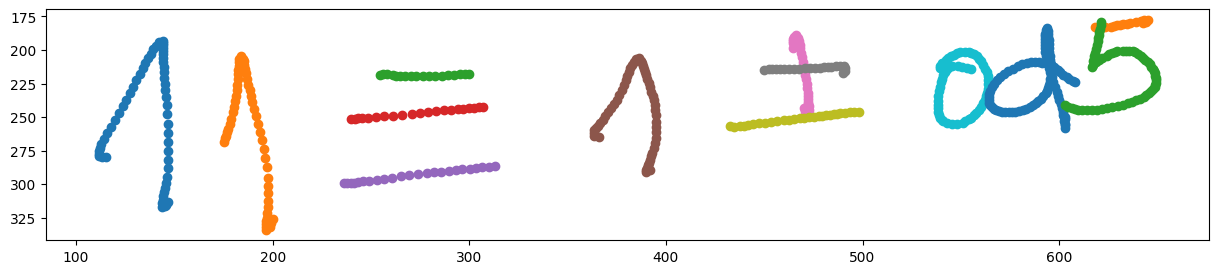

In [83]:
figure_size = (15, 3)
fig, ax = plt.subplots()
fig.set_size_inches(figure_size)
ax.invert_yaxis()

for stroke in strokes_np:
    ax.scatter(stroke[:, 0], stroke[:, 1])

plt.show()